<a href="https://colab.research.google.com/github/preetamjumech/Avila_DataSet_AdaBoost-GradientBoost-XGboost/blob/main/AML_Preetam_Saha_C22018_avila_dataset_part2_29_05_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer

In [2]:
df_train=pd.read_csv("avila-tr.txt",header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [ ]:
df_train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [ ]:
df_train[10].value_counts()

A    4286
F    1961
E    1095
I     831
X     522
H     519
G     446
D     352
Y     266
C     103
W      44
B       5
Name: 10, dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10430 non-null  float64
 1   1       10430 non-null  float64
 2   2       10430 non-null  float64
 3   3       10430 non-null  float64
 4   4       10430 non-null  float64
 5   5       10430 non-null  float64
 6   6       10430 non-null  float64
 7   7       10430 non-null  float64
 8   8       10430 non-null  float64
 9   9       10430 non-null  float64
 10  10      10430 non-null  object 
dtypes: float64(10), object(1)
memory usage: 896.5+ KB


In [ ]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [ ]:
df_train.corr().unstack().sort_values(ascending=False).drop_duplicates()

0  0    1.000000
5  9    0.755992
1  6    0.582443
8  7    0.487543
5  6    0.462871
4  0    0.451966
5  1    0.424384
2  1    0.414578
1  8    0.349011
7  3    0.338970
9  3    0.323915
6  2    0.289165
3  8    0.281239
8  4    0.274883
6  8    0.272458
   9    0.263015
3  5    0.257627
8  5    0.214207
   2    0.193194
9  8    0.186226
4  9    0.151590
2  3    0.143608
   5    0.132723
4  3    0.096426
0  8    0.059427
6  3    0.043915
7  1    0.041227
5  4    0.039824
7  2    0.034970
2  0    0.034473
6  4    0.026447
4  2    0.011333
7  6    0.002444
1  3    0.002026
6  0   -0.001173
9  0   -0.002839
7  9   -0.016045
9  1   -0.024810
0  1   -0.037577
7  0   -0.043336
0  5   -0.044663
9  2   -0.045392
7  5   -0.059628
0  3   -0.065338
4  1   -0.067759
7  4   -0.071220
dtype: float64

In [ ]:
df_test=pd.read_csv("avila-ts.txt",header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A


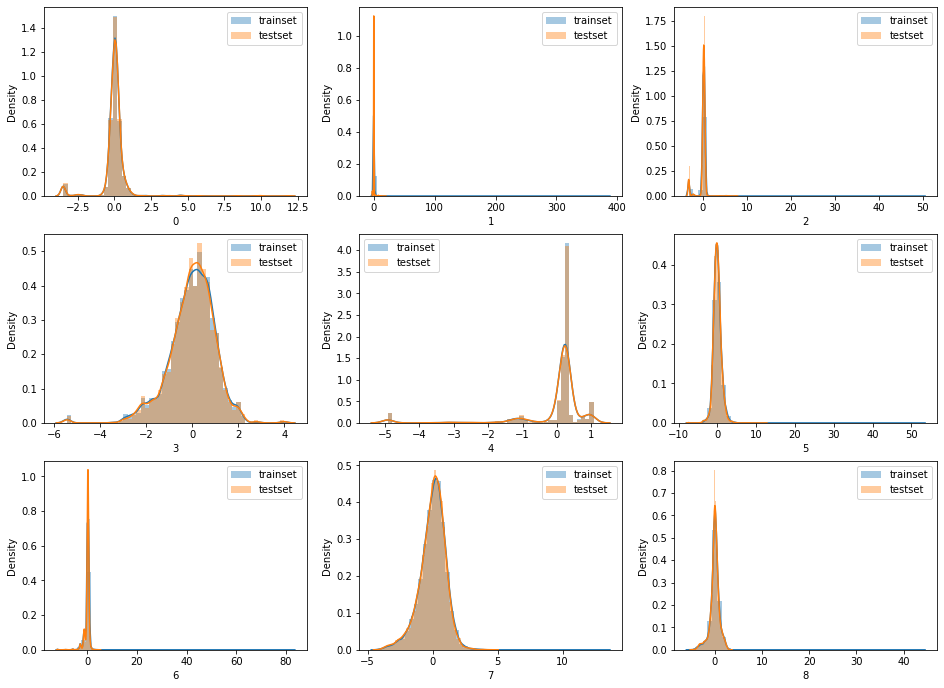

In [ ]:
plt.figure(figsize=(16,16))
for k in range(9):
    plt.subplot(4,3,k+1)
    sns.distplot(df_train.iloc[:,k], label='trainset')
    sns.distplot(df_test.iloc[:,k], label='testset')
    plt.legend()

In [3]:
from sklearn.metrics import SCORERS

In [ ]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
### mapping non-linearity by DT REGRESSOR

In [5]:
dt = DecisionTreeRegressor(max_depth=10)

In [6]:
score=[]
for i , j in combinations(range(9),2):
  cv_score=cross_val_score(dt,X=np.array(df_train.iloc[:,i]).reshape(-1,1),y=df_train.iloc[:,j],cv=5,scoring='neg_median_absolute_error').mean()
  print(f"{i} and {j} has cv_score {np.round(cv_score,4)}")
  score.append(cv_score)
print(np.round(score,4))
np.argmin(np.abs(np.round(score,4)))

0 and 1 has cv_score -0.2213
0 and 2 has cv_score -0.2131
0 and 3 has cv_score -0.5105
0 and 4 has cv_score -0.1236
0 and 5 has cv_score -0.5306
0 and 6 has cv_score -0.2716
0 and 7 has cv_score -0.5926
0 and 8 has cv_score -0.4298
1 and 2 has cv_score -0.1823
1 and 3 has cv_score -0.5587
1 and 4 has cv_score -0.2427
1 and 5 has cv_score -0.5603
1 and 6 has cv_score -0.3226
1 and 7 has cv_score -0.5906
1 and 8 has cv_score -0.4593
2 and 3 has cv_score -0.5323
2 and 4 has cv_score -0.1692
2 and 5 has cv_score -0.5611
2 and 6 has cv_score -0.3156
2 and 7 has cv_score -0.5821
2 and 8 has cv_score -0.4436
3 and 4 has cv_score -0.1598
3 and 5 has cv_score -0.4972
3 and 6 has cv_score -0.2855
3 and 7 has cv_score -0.5053
3 and 8 has cv_score -0.4163
4 and 5 has cv_score -0.5671
4 and 6 has cv_score -0.2384
4 and 7 has cv_score -0.5951
4 and 8 has cv_score -0.4504
5 and 6 has cv_score -0.3203
5 and 7 has cv_score -0.5626
5 and 8 has cv_score -0.425
6 and 7 has cv_score -0.6027
6 and 8 has cv_

3

In [ ]:
np.abs(score)

array([0.22130666, 0.21313326, 0.5104702 , 0.12357362, 0.53063084,
       0.27162585, 0.59262408, 0.42979538, 0.18230718, 0.55874243,
       0.24274158, 0.56025004, 0.32259493, 0.59061333, 0.45929376,
       0.53233284, 0.16918724, 0.56110673, 0.31561202, 0.58211641,
       0.44356114, 0.15975774, 0.49716751, 0.2855381 , 0.50525666,
       0.41628284, 0.56713863, 0.23840028, 0.59506472, 0.45035642,
       0.32033428, 0.56256065, 0.42502895, 0.60273476, 0.44152044,
       0.37954023])

In [ ]:
np.min(np.abs(score))

0.12357361573618852

In [7]:
X=df_train.iloc[:,1]
X

0       -0.165620
1        0.870736
2        0.069915
3        0.297600
4        0.807926
           ...   
10425    0.588093
10426   -0.338346
10427   -0.000745
10428    0.352558
10429   -1.037102
Name: 1, Length: 10430, dtype: float64

In [ ]:
X=np.array(df_train.iloc[:,1]).reshape(-1,1)
X

array([[-1.656200e-01],
       [ 8.707360e-01],
       [ 6.991500e-02],
       ...,
       [-7.450000e-04],
       [ 3.525580e-01],
       [-1.037102e+00]])

In [ ]:
### mapping non-linearity by KNN REGRESSOR with k=5 WITH NEGATIVE MEDIAN ABSOLUTE ERROR

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_reg=make_pipeline(StandardScaler(),
                          KNeighborsRegressor(n_neighbors=5))

In [ ]:
score=[]
for i , j in combinations(range(9),2):
  cv_score=cross_val_score(knn_reg,X=np.array(df_train.iloc[:,i]).reshape(-1,1),y=df_train.iloc[:,j],cv=5,scoring='neg_median_absolute_error').mean()
  print(f"{i} and {j} has cv_score {np.round(cv_score,4)}")
  score.append(cv_score)
print(np.round(score,4))
np.argmin(np.abs(np.round(score,4)))

0 and 1 has cv_score -0.2344
0 and 2 has cv_score -0.1881
0 and 3 has cv_score -0.5366
0 and 4 has cv_score -0.118
0 and 5 has cv_score -0.6079
0 and 6 has cv_score -0.3307
0 and 7 has cv_score -0.6501
0 and 8 has cv_score -0.5126
1 and 2 has cv_score -0.1218
1 and 3 has cv_score -0.5113
1 and 4 has cv_score -0.1466
1 and 5 has cv_score -0.6046
1 and 6 has cv_score -0.3503
1 and 7 has cv_score -0.6399
1 and 8 has cv_score -0.5232
2 and 3 has cv_score -0.5098
2 and 4 has cv_score -0.0983
2 and 5 has cv_score -0.6046
2 and 6 has cv_score -0.3526
2 and 7 has cv_score -0.6214
2 and 8 has cv_score -0.5222
3 and 4 has cv_score 0.0
3 and 5 has cv_score -0.4601
3 and 6 has cv_score -0.2658
3 and 7 has cv_score -0.4859
3 and 8 has cv_score -0.3642
4 and 5 has cv_score -0.6063
4 and 6 has cv_score -0.3166
4 and 7 has cv_score -0.6361
4 and 8 has cv_score -0.4665
5 and 6 has cv_score -0.3609
5 and 7 has cv_score -0.6361
5 and 8 has cv_score -0.5532
6 and 7 has cv_score -0.662
6 and 8 has cv_score

21

In [ ]:
cv_score

-0.44277695999999994

In [ ]:
### mapping non-linearity with DT REG with NEGATIVE ROOT MEAN SQUARED ERROR

In [ ]:
for i , j in combinations(range(9),2):
  cv_score=cross_val_score(dt,X=np.array(df_train.iloc[:,i]).reshape(-1,1),y=df_train.iloc[:,j],cv=5,scoring='neg_root_mean_squared_error').mean()
  print(f"{i} and {j} has cv_score {np.round(cv_score,4)}")

0 and 1 has cv_score -2.4936
0 and 2 has cv_score -1.0148
0 and 3 has cv_score -0.8359
0 and 4 has cv_score -0.5213
0 and 5 has cv_score -1.0366
0 and 6 has cv_score -1.2048
0 and 7 has cv_score -0.9673
0 and 8 has cv_score -0.9688
1 and 2 has cv_score -1.0061
1 and 3 has cv_score -0.9086
1 and 4 has cv_score -0.86
1 and 5 has cv_score -1.0944
1 and 6 has cv_score -1.2742
1 and 7 has cv_score -0.986
1 and 8 has cv_score -1.0554
2 and 3 has cv_score -0.8933
2 and 4 has cv_score -0.8666
2 and 5 has cv_score -1.0679
2 and 6 has cv_score -1.2331
2 and 7 has cv_score -0.9633
2 and 8 has cv_score -1.0337
3 and 4 has cv_score -0.7109
3 and 5 has cv_score -0.9859
3 and 6 has cv_score -1.2205
3 and 7 has cv_score -0.8667
3 and 8 has cv_score -0.9516
4 and 5 has cv_score -1.0558
4 and 6 has cv_score -1.1693
4 and 7 has cv_score -0.9814
4 and 8 has cv_score -0.9987
5 and 6 has cv_score -1.2557
5 and 7 has cv_score -0.9765
5 and 8 has cv_score -1.0501
6 and 7 has cv_score -1.0209
6 and 8 has cv_sc

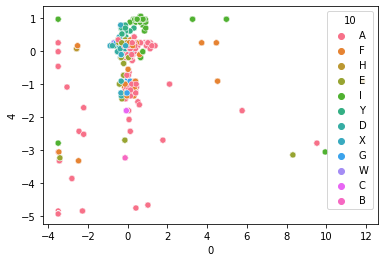

In [ ]:
sns.scatterplot(data = df_train, x=df_train.iloc[:,0], 
                y=df_train.iloc[:,4], hue=10)

In [9]:
from xgboost import XGBClassifier

In [10]:
xgb = XGBClassifier(n_estimators=3000, max_depth=1, 
                    learning_rate=0.01, booster='gbtree')

In [ ]:
xgb.fit(df_train.iloc[:,:-1],df_train.iloc[:,-1])

XGBClassifier(learning_rate=0.01, max_depth=1, n_estimators=3000,
              objective='multi:softprob')

In [ ]:
df_train.iloc[:,:-1]

,0,1,2,3,4,5,6,7,8,9
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652
...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969


In [ ]:
df_train.iloc[:,-1]

0        A
1        A
2        A
3        A
4        F
        ..
10425    F
10426    F
10427    A
10428    E
10429    X
Name: 10, Length: 10430, dtype: object

In [ ]:
### cohen kappa

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
cohen_kappa_score(df_test.iloc[:,-1],xgb.predict(df_test.iloc[:,:-1]))

0.6704581464333796

In [ ]:
cv_score=cross_val_score(xgb,df_test.iloc[:,:-1],df_test.iloc[:,-1],scoring=make_scorer(cohen_kappa_score),cv=5,n_jobs=-1)

In [ ]:
cv_score

array([0.65969896, 0.67896569, 0.67026109, 0.68352469, 0.64729249])

In [ ]:
cv_score.mean()

0.6679485852287477

In [ ]:
### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred = xgb.predict(df_test.iloc[:,:-1])

In [ ]:
pd.DataFrame(confusion_matrix(df_test.iloc[:,10],pred))

,0,1,2,3,4,5,6,7,8,9,10,11
0,3847,0,0,31,115,229,32,29,1,0,2,0
1,0,4,0,0,0,0,0,0,0,0,1,0
2,30,0,46,0,18,9,0,0,0,0,0,0
3,32,0,0,252,53,9,0,6,0,0,1,0
4,181,0,0,21,785,39,10,44,1,0,13,1
5,1054,0,0,0,22,839,25,22,0,0,0,0
6,120,0,0,0,10,32,277,8,0,0,0,0
7,125,0,0,0,10,21,13,351,0,0,0,0
8,14,0,0,0,0,1,0,0,809,2,1,5
9,12,0,0,0,0,0,0,0,0,32,1,0


In [ ]:
### categorical cross entropy

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr = LogisticRegression(random_state=42)

In [ ]:
lgr.fit(df_train.iloc[:,:-1],df_train.iloc[:,-1])

LogisticRegression(random_state=42)

In [ ]:
lgr.predict(df_test.iloc[:,:-1])

array(['W', 'X', 'I', ..., 'A', 'A', 'A'], dtype=object)

In [ ]:
lgr.score(df_test.iloc[:,:-1],df_test.iloc[:,-1])

0.5608891443901505

In [ ]:
lgr.predict_proba(df_test.iloc[:,:-1])

array([[1.83209332e-01, 9.92511574e-04, 3.69434161e-03, ...,
        3.92506575e-01, 1.98155872e-01, 2.40846783e-02],
       [2.05421206e-02, 3.75643220e-04, 1.05805140e-02, ...,
        6.12723351e-05, 4.96491511e-01, 3.37153536e-03],
       [9.21337494e-02, 1.28827235e-04, 9.85282950e-03, ...,
        1.43469612e-05, 3.21690062e-03, 6.83126986e-04],
       ...,
       [6.28925576e-01, 2.38946704e-04, 5.32223565e-03, ...,
        3.25514883e-03, 2.45173389e-03, 1.58614119e-03],
       [3.48188434e-01, 4.39933836e-04, 1.76383293e-02, ...,
        4.65614624e-04, 7.92492773e-04, 1.33730020e-02],
       [2.78549369e-01, 3.07582157e-04, 1.66371672e-02, ...,
        3.47046074e-04, 1.99410400e-03, 7.59517411e-03]])

In [ ]:
xgb = XGBClassifier(n_estimators=3000, max_depth=1, 
                    learning_rate=0.01, booster='gbtree')

In [ ]:
xgb.fit(df_train.iloc[:,:-1],df_train.iloc[:,-1])

XGBClassifier(learning_rate=0.01, max_depth=1, n_estimators=3000,
              objective='multi:softprob')

In [ ]:
xgb.predict(df_test.iloc[:,:-1])

array(['W', 'X', 'I', ..., 'A', 'F', 'H'], dtype=object)

In [ ]:
pred=xgb.predict_proba(df_test.iloc[:,:-1])

In [ ]:
pred

array([[3.57696623e-01, 6.74503535e-05, 1.15742011e-03, ...,
        5.69414318e-01, 1.34424847e-02, 6.00467110e-03],
       [3.02706867e-01, 2.65928596e-04, 2.10878160e-03, ...,
        2.10295038e-04, 5.44125259e-01, 6.91035436e-03],
       [4.63087350e-01, 2.92907248e-06, 1.22880680e-03, ...,
        1.48765748e-05, 8.90149735e-03, 1.10214890e-03],
       ...,
       [3.75260532e-01, 4.26015722e-05, 6.29960618e-04, ...,
        2.47017364e-04, 8.93659948e-04, 3.18040280e-03],
       [2.42322788e-01, 3.27921703e-06, 6.62550854e-04, ...,
        1.01548314e-04, 3.36002733e-04, 1.83503167e-03],
       [2.97184795e-01, 2.35380912e-06, 2.64060247e-04, ...,
        2.72351113e-04, 8.38360225e-04, 1.17380382e-03]], dtype=float32)

In [ ]:
pred[0]

array([3.5769662e-01, 6.7450354e-05, 1.1574201e-03, 9.0917846e-04,
       3.3284046e-02, 1.1482230e-02, 4.6475921e-03, 4.5620417e-04,
       1.4377646e-03, 5.6941432e-01, 1.3442485e-02, 6.0046711e-03],
      dtype=float32)

In [ ]:
-np.log(pred[0])

array([1.0280701 , 9.604118  , 6.761562  , 7.0029693 , 3.402677  ,
       4.4669547 , 5.371406  , 7.69257   , 6.544666  , 0.56314695,
       4.309335  , 5.1152177 ], dtype=float32)

In [ ]:
xgb.predict_proba(df_test.iloc[:,:-1])[0]

array([3.5769662e-01, 6.7450354e-05, 1.1574201e-03, 9.0917846e-04,
       3.3284046e-02, 1.1482230e-02, 4.6475921e-03, 4.5620417e-04,
       1.4377646e-03, 5.6941432e-01, 1.3442485e-02, 6.0046711e-03],
      dtype=float32)

In [ ]:
xgb.predict_proba(df_test.iloc[:,:-1])[0].max()

0.5694143

In [ ]:
-np.log(0.5694143)

0.5631469902983037

In [ ]:
np.argmax(xgb.predict_proba(df_test.iloc[:,:-1])[0])

9

In [ ]:
df_test.iloc[0,-1]

'W'

In [ ]:
df_train[10]

0        A
1        A
2        A
3        A
4        F
        ..
10425    F
10426    F
10427    A
10428    E
10429    X
Name: 10, Length: 10430, dtype: object

In [ ]:
pd.get_dummies(df_train[10])

,A,B,C,D,E,F,G,H,I,W,X,Y
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10425,0,0,0,0,0,1,0,0,0,0,0,0
10426,0,0,0,0,0,1,0,0,0,0,0,0
10427,1,0,0,0,0,0,0,0,0,0,0,0
10428,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df=pd.get_dummies(df_test[10])

In [ ]:
df

,A,B,C,D,E,F,G,H,I,W,X,Y
0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10432,0,0,0,0,0,0,0,0,0,0,1,0
10433,0,0,0,0,0,0,1,0,0,0,0,0
10434,1,0,0,0,0,0,0,0,0,0,0,0
10435,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
cce=-(df* np.log(pred))
cce

,A,B,C,D,E,F,G,H,I,W,X,Y
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.563147,0.000000,0.0
1,1.194990,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.709541,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,0.0,1.476097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.324059,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10432,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.406722,0.0
10433,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.945158,0.000000,0.000000,0.000000,0.000000,0.0
10434,0.980135,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
10435,0.000000,0.0,0.0,0.0,0.000000,0.786296,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
col_cce=cce.sum(axis=0)
col_cce

A    2108.763428
B       3.003357
C     151.306366
D     339.916748
E     989.283020
F    1991.318848
G     439.025360
H     473.599731
I      76.004639
W      39.699711
X     317.634857
Y     113.512123
dtype: float32

In [ ]:
total_cce=col_cce.sum()
total_cce

7043.0684

In [11]:
def cat_cross_entropy_score(model,df_train,df_test):
  model=model.fit(df_train.iloc[:,:-1],df_train.iloc[:,-1])
  pred=model.predict_proba(df_test.iloc[:,:-1])
  dummy=pd.get_dummies(df_test.iloc[:,-1])
  df_cce=-(dummy*np.log(pred))
  col_sum_cce = df_cce.sum(axis=0)
  total_cce_score = col_sum_cce.sum()
  return total_cce_score

In [12]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [ ]:
cat_cross_entropy_score(LogisticRegression(),df_train,df_test)

13772.119414561683

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [ ]:
cat_cross_entropy_score(xgb,df_train,df_test)

4225.608

In [ ]:
xgb1 = XGBClassifier(n_estimators=3000, max_depth=1, 
                    learning_rate=0.01, booster='gbtree')

In [ ]:
cat_cross_entropy_score(xgb1,df_train,df_test)

7043.0684

In [ ]:
### Stacking

In [13]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42))),
              ('knn',make_pipeline(StandardScaler(),
                          KNeighborsClassifier(n_neighbors=3)))
]

In [ ]:
clf = StackingClassifier(estimators=estimators,final_estimator=XGBClassifier())

In [ ]:
clf.fit(df_train.iloc[:,:-1],df_train.iloc[:,-1])

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))])),
                               ('knn',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(n_neighbors=3))]))],
                   final_estimator=XGBClassifier())

In [ ]:
cohen_kappa_score(df_test.iloc[:,-1],clf.predict(df_test.iloc[:,:-1]))

0.9608657136766391

In [ ]:
cv_score=cross_val_score(clf,df_test.iloc[:,:-1],df_test.iloc[:,-1],scoring=make_scorer(cohen_kappa_score),cv=5,n_jobs=-1)

In [ ]:
cv_score

array([0.96702555, 0.9558101 , 0.95193533, 0.96503401, 0.94400314])

In [ ]:
cv_score.mean()

0.9567616253524853

In [ ]:
cat_cross_entropy_score(clf,df_train,df_test)

1021.77856

In [ ]:
### Bagging with KNN

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
clf = BaggingClassifier(base_estimator=make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=5)),
                         n_estimators=10, random_state=0).fit(df_train.iloc[:,:-1], df_train.iloc[:,-1])

In [ ]:
clf.predict(df_test.iloc[:,:-1])

array(['A', 'Y', 'F', ..., 'A', 'A', 'A'], dtype=object)

In [ ]:
clf.predict_proba(df_test.iloc[:,:-1])

array([[0.44, 0.  , 0.  , ..., 0.4 , 0.12, 0.  ],
       [0.26, 0.  , 0.  , ..., 0.  , 0.  , 0.32],
       [0.32, 0.  , 0.  , ..., 0.  , 0.08, 0.  ],
       ...,
       [0.54, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.4 , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.38, 0.  , 0.06, ..., 0.  , 0.  , 0.  ]])

In [ ]:
clf.predict_proba(df_test.iloc[:,:-1])[0]

array([0.44, 0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.4 , 0.12,
       0.  ])

In [ ]:
clf.predict_proba(df_test.iloc[:,:-1])[1]

array([0.26, 0.  , 0.  , 0.12, 0.24, 0.  , 0.  , 0.06, 0.  , 0.  , 0.  ,
       0.32])

In [ ]:
clf.score(df_test.iloc[:,:-1],df_test.iloc[:,-1])

0.7416882245856089

In [ ]:
cat_cross_entropy_score(clf,df_train,df_test)

inf

In [ ]:
cohen_kappa_score(df_test.iloc[:,-1],clf.predict(df_test.iloc[:,:-1]))

0.6540665980286771

In [ ]:
cv_score=cross_val_score(clf,df_test.iloc[:,:-1],df_test.iloc[:,-1],scoring=make_scorer(cohen_kappa_score),cv=5,n_jobs=-1)

In [ ]:
cv_score.mean()

0.6394818458791458

In [ ]:
# hyperparameters with xgboost

In [ ]:
clf_xgb=XGBClassifier(objective="multi:softprob",random_state=42)
clf_xgb.fit(df_train.iloc[:,:-1],df_train.iloc[:,-1])

XGBClassifier(objective='multi:softprob', random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
def kappa(y_act, y_pred):
    return cohen_kappa_score(y_act, y_pred)

Kappa = make_scorer(kappa)

In [16]:
param_grid = {
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight':[1,3,5]

}
optimal_params=GridSearchCV(
    estimator=XGBClassifier(
        objective="multi:softprob",
        seed=42,
        subsample=0.9,
        colsample_bytree=0.5),
        param_grid=param_grid,
        verbose=True,
        scoring=kappa,
        n_jobs=-1,
        cv=3
)

In [ ]:
optimal_params.fit(df_train.iloc[:,:-1],df_train.iloc[:,-1])
print(optimal_params.best_score_)
print(optimal_params.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [ ]:
param_grid = {
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight':[1,3,5]

}
optimal_params=GridSearchCV(
    estimator=XGBClassifier(
        objective="multi:softprob",
        seed=42,
        subsample=0.9,
        colsample_bytree=0.5),
        param_grid=param_grid,
        verbose=True,
        scoring=kappa,
        n_jobs=-1,
        cv=3
)

In [ ]:
optimal_params.fit(df_train.iloc[:,:-1],df_train.iloc[:,-1])
print(optimal_params.best_score_)
print(optimal_params.best_params_)